# [ICTCOG AI Academy] 7기 고급시각저녁반
# AutoEncoder / DC AutoEncoder

전통적인 머신러닝은 사람이 feature selection 

### AutoEncoder
- Encoder 
  - 원래 데이터의 압축(**학습을 통해서 저차원의 숨어있는 표현을 찾음**)
- Decoder
  - 알고리즘에 의해서 원래 데이터로 복원

#### 특징
- data-specific
- lossy
  - 손실 있는 복원
- 데이터 기반으로 자동으로 학습

- Unspuervised learning
  - 정답데이터 없음
- Nonlinear Dimensionality Reduction
- Representation Learning 
- Manifold Learning
  - 고차원 -> 저차원 형태
  - > PCA 주성분분석 
    - 모델이 아님

- Generative model Learning
  - 압축된것을 기반으로 생성
- 활용: 노이즈 제거, 차원 축소해서 시각화

#### 핵심 3 구성
- encoding function
- decoding function 
- losss  function : 원본에 대해 압축된 표현과 압축 해제된 표현간 정보 손실량간의 거리 함수


keras 블로그 참고: https://blog.keras.io/building-autoencoders-in-keras.html



#### manifold learning
#### PCA


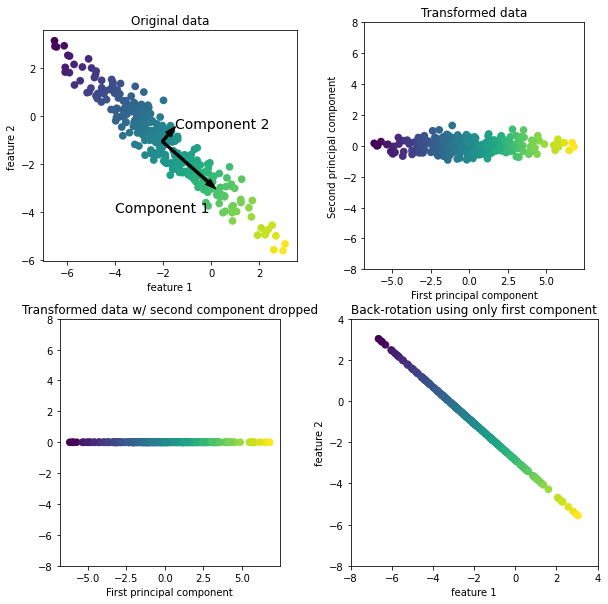

In [5]:
#manifold learning 의 예 . PCA
import mglearn
mglearn.plot_pca.plot_pca_illustration() 

In [6]:
import seaborn as sns

In [7]:
iris=sns.load_dataset('iris')

In [8]:
iris #4개 차원에 비해 데이터 150개가ris #4개 차원에 비해 데이터 150개가 있음 있음

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [10]:
data= load_iris()

In [11]:
pca =PCA(2) #주성분 2개
pca.fit_transform(data.data)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [12]:
data.data.shape

(150, 4)

In [13]:
pca.fit_transform(data.data).shape  #4차원 ->2차원으로 축소

(150, 2)

In [14]:
import tensorflow as tf

In [15]:
(X_train,_),(X_test,_) =tf.keras.datasets.mnist.load_data()  #비지도 학습이라서 정답 불필요 
X_train = X_train/255
X_test= X_test/255

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(60000,-1)

In [18]:
X_train.shape

(60000, 784)

In [19]:
representation = 64

inputs =tf.keras.Input(shape=(28*28,))
encoder= tf.keras.layers.Dense(representation, activation='relu')(inputs) #784 -> 64차원으로 표현
decoder=tf.keras.layers.Dense(28*28,activation='sigmoid')(encoder)        #64 -> 784차원으로 표현
autoencoder=tf.keras.models.Model(inputs=inputs,outputs=decoder)

In [20]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train,X_train, epochs=150, batch_size=256)

Epoch 1/150
235/235 [==============================] - 3s 2ms/step - loss: 0.3505
Epoch 2/150
235/235 [==============================] - 1s 2ms/step - loss: 0.1515
Epoch 3/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1230
Epoch 4/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1073
Epoch 5/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0973
Epoch 6/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0900
Epoch 7/150
235/235 [==============================] - 1s 2ms/step - loss: 0.0851
Epoch 8/150
235/235 [==============================] - 1s 2ms/step - loss: 0.0817
Epoch 9/150
235/235 [==============================] - 1s 2ms/step - loss: 0.0793
Epoch 10/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0778
Epoch 11/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0767
Epoch 12/150
235/235 [==============================] - 1s 2ms/step - loss: 0.0759
Epoch 13/150


- 학습을 많이 시켜도 성능이 좋지 않음
- 레이어를 추가하여 모델의 복잡성을 늘려야함

In [22]:
X_test=X_test.reshape(10000,-1)
autoencoder(X_test)

<tf.Tensor: shape=(10000, 784), dtype=float32, numpy=
array([[5.44225992e-12, 1.63761105e-11, 9.61340382e-12, ...,
        3.21599483e-11, 1.75615321e-11, 4.21664136e-12],
       [7.98867795e-16, 5.53171701e-16, 1.10905937e-14, ...,
        1.42051692e-15, 5.37108674e-15, 2.22596383e-15],
       [3.83147523e-08, 1.57925140e-08, 6.54449082e-08, ...,
        6.06271726e-08, 7.37763273e-08, 2.83384196e-08],
       ...,
       [7.36839202e-16, 1.84452287e-15, 1.64749602e-14, ...,
        4.96419685e-14, 1.13430375e-14, 5.19379269e-16],
       [8.29089571e-15, 3.37524334e-14, 7.89278378e-14, ...,
        4.22694567e-13, 1.51344093e-13, 4.56242066e-14],
       [4.62909496e-20, 1.70041709e-20, 6.28076533e-19, ...,
        6.77585580e-20, 1.46913804e-19, 2.49965037e-19]], dtype=float32)>

In [23]:
autoencoder(X_test)[:10] #10개

<tf.Tensor: shape=(10, 784), dtype=float32, numpy=
array([[5.4422599e-12, 1.6376111e-11, 9.6134038e-12, ..., 3.2159948e-11,
        1.7561532e-11, 4.2166414e-12],
       [7.9886780e-16, 5.5317170e-16, 1.1090594e-14, ..., 1.4205169e-15,
        5.3710867e-15, 2.2259638e-15],
       [3.8314752e-08, 1.5792514e-08, 6.5444908e-08, ..., 6.0627173e-08,
        7.3776327e-08, 2.8338420e-08],
       ...,
       [1.8452517e-11, 2.6200266e-11, 2.1994264e-11, ..., 1.0501426e-10,
        2.9247525e-11, 8.3414768e-12],
       [1.9138858e-15, 3.0808378e-16, 2.2400102e-15, ..., 1.4112432e-15,
        1.6298487e-15, 4.2963185e-14],
       [9.1769660e-17, 1.4978764e-16, 6.0616981e-16, ..., 1.5506275e-15,
        2.0836860e-15, 6.9335616e-17]], dtype=float32)>

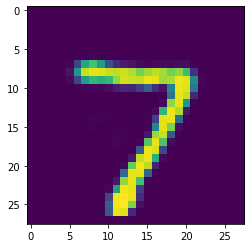

In [24]:
import matplotlib.pyplot as plt

plt.imshow(autoencoder(X_test)[:10][0].numpy().reshape(28,28))

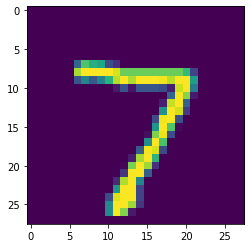

In [25]:
plt.imshow(X_test[0].reshape(28,28))

In [28]:
#성능을 위해서 레이어 깊도록 추가함

inputs =tf.keras.Input(shape=(28*28,))
encoder= tf.keras.layers.Dense(512, activation='relu')(inputs) #784 -> 64차원으로 표현
encoder= tf.keras.layers.Dense(256, activation='relu')(encoder) #784 -> 64차원으로 표현
encoder= tf.keras.layers.Dense(128, activation='relu')(encoder)
encoder= tf.keras.layers.Dense(representation, activation='relu')(encoder)
decoder=tf.keras.layers.Dense(128,activation='sigmoid')(encoder)        #64 -> 784차원으로 표현
decoder=tf.keras.layers.Dense(256,activation='sigmoid')(decoder) 
decoder=tf.keras.layers.Dense(512,activation='sigmoid')(decoder) 
decoder=tf.keras.layers.Dense(28*28,activation='sigmoid')(decoder) 
autoencoder=tf.keras.models.Model(inputs=inputs,outputs=decoder)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  
autoencoder.fit(X_train,X_train, epochs=150, batch_size=256)

Epoch 1/150
235/235 [==============================] - 1s 3ms/step - loss: 0.2993
Epoch 2/150
235/235 [==============================] - 1s 3ms/step - loss: 0.2346
Epoch 3/150
235/235 [==============================] - 1s 3ms/step - loss: 0.2131
Epoch 4/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1921
Epoch 5/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1778
Epoch 6/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1668
Epoch 7/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1610
Epoch 8/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1528
Epoch 9/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1441
Epoch 10/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1380
Epoch 11/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1341
Epoch 12/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1302
Epoch 13/150


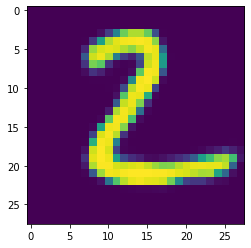

In [29]:
plt.imshow(autoencoder(X_test)[1].numpy().reshape(28,28))

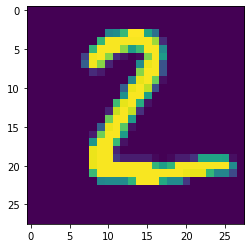

In [35]:
plt.imshow(X_test[1].reshape(28,28))

### Regularizer
- L1, L2 
- kernel, bias , activity 규제로 갑작스럽게 변하지 않도록 막아줌

In [38]:
representation = 64

inputs =tf.keras.Input(shape=(28*28,))
encoder= tf.keras.layers.Dense(representation, activity_regularizer=tf.keras.regularizers.l1(10e-5),
                               activation='relu')(inputs) #784 -> 64차원으로 표현
decoder=tf.keras.layers.Dense(28*28,activation='sigmoid')(encoder)        #64 -> 784차원으로 표현
autoencoder=tf.keras.models.Model(inputs=inputs,outputs=decoder)

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  
autoencoder.fit(X_train,X_train, epochs=150, batch_size=256)

Epoch 1/150
235/235 [==============================] - 1s 3ms/step - loss: 0.3585
Epoch 2/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1615
Epoch 3/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1339
Epoch 4/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1197
Epoch 5/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1103
Epoch 6/150
235/235 [==============================] - 1s 3ms/step - loss: 0.1037
Epoch 7/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0990
Epoch 8/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0960
Epoch 9/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0938
Epoch 10/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0920
Epoch 11/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0908
Epoch 12/150
235/235 [==============================] - 1s 3ms/step - loss: 0.0897
Epoch 13/150


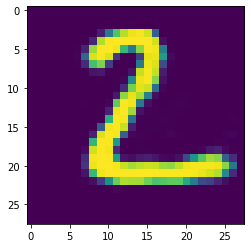

In [40]:
plt.imshow(autoencoder(X_test)[:10][1].numpy().reshape(28,28))

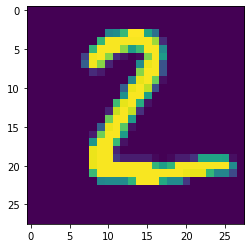

In [44]:
plt.imshow(X_test[:10][1].reshape(28,28))

### Convolutional AutoEncoder

In [45]:
#3차원 이미지로 입력 받음음3차원 이미지로 입력 받음음
(X_train,_),(X_test,_) =tf.keras.datasets.mnist.load_data()  #
X_train=X_train.reshape(-1,28,28,1) /255 
X_test= X_test.reshape(-1,28,28,1) /255

In [47]:
inputs_ =tf.keras.Input(shape=(28,28,1))

padding 으로 크기 맞춤

In [57]:
#encoding
x=tf.keras.layers.Conv2D(16,3,padding='same',activation='relu')(inputs_)
x= tf.keras.layers.MaxPool2D(2,padding='same')(x)
x=tf.keras.layers.Conv2D(8,3,padding='same',activation='relu')(x)
x= tf.keras.layers.MaxPool2D(2,padding='same')(x)
x=tf.keras.layers.Conv2D(8,3,padding='same',activation='relu')(x)
encoder= tf.keras.layers.MaxPool2D(2,padding='same')(x)    #4x4x8=128

In [56]:
temp_model=tf.keras.models.Model(inputs_,encoder)
temp_model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 8)           0  

In [ ]:
# 복원 시키는 방법
tf.keras.layers.UpSampling2D  #
tf.keras.layers.Convolution2DTranspose

In [73]:
#decoder
x = tf.keras.layers.Conv2D(8, 3, activation='relu', padding='same')(encoder)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(8, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
decoder = tf.keras.layers.Conv2D(1, 3, padding='same',activation='sigmoid')(x) 

autoencoder = tf.keras.Model(inputs_, decoder)
autoencoder.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 8)           0  

In [74]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [75]:
autoencoder.fit(X_train,X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2061
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1158
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1071
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1023
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0993
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0976
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0961
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0950
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0941
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0933
Epoch 11/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0926
Epoch 12/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0921
E

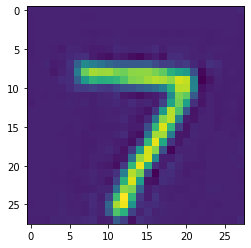

In [70]:
plt.imshow(autoencoder.predict(X_test)[0].reshape(28,28))

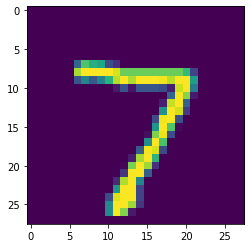

In [72]:
plt.imshow(X_test[0].reshape(28,28))

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [78]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


- 재활용 가능
- 유연성 
- 상황에 맞는 동적값 생성
- 함수형 패러다임

In [79]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x): 
    #인스턴스 ()
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)  #인스턴스스

In [80]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [81]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0398 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0123 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

In [82]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

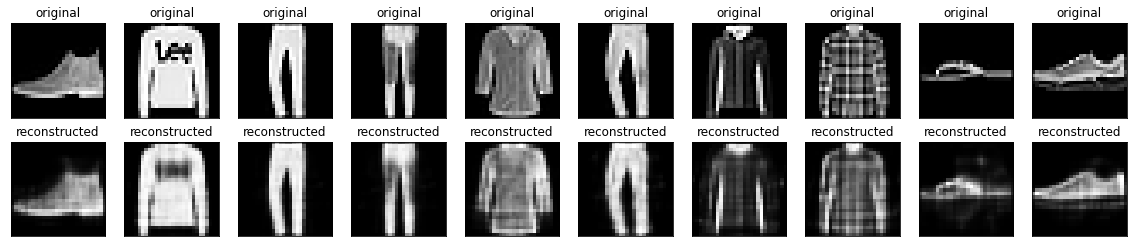

In [83]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # 원래 이미지
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # 복원한 이미지
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()   

In [ ]:
#Convolutional AutoEncoder class로 생성
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),  #Conv2DTranspose 사용   
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
#이상 탐지
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()on="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

뼈대 위주로 기억하기